#Pregnancies:

Number of times pregnant for the group in that cluster

Glucose:

Plasma glucose concentration after 2 hours in an oral glucose tolerance test.

BloodPressure:

Diastolic blood pressure (mm Hg).

SkinThickness:

Triceps skinfold thickness (mm).

Insulin:

2-Hour serum insulin (mu U/ml).

BMI (Body Mass Index):

Weight in kg / (height in meters)^2.

DiabetesPedigreeFunction:

Diabetes pedigree function, which provides information about the
diabetes history in relatives and the genetic relationship of those
relatives to the patient.

Age:

Age in years.

Outcome:

The target variable indicating whether the person has diabetes or not.

Outcome = 1: Person has diabetes.
Outcome = 0: Person does not have diabetes.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm, skew
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE #generating synthetic samples of the minority class 
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import math
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, r2_score

In [2]:
Diabetes=pd.read_csv("/Users/souravghoshhansda/Library/CloudStorage/OneDrive-Personal/data_exploration_ml/diabetes dataset.csv")

In [3]:
Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
Diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

1#make the numbers of paramgrid smaller if we see overfitting after doing hyperparameter tuning

2# As a 2nd attempt we can reduce the features or model parameters within the param grid to pass it through lesser number of constraints in order to avoid overfitting as much as possible.

3#other attempts of resolving ovefitting after doing hyperparameter tuning can be 

1)Changing the random state

2)Changing the cv folds

3)Changing train-test split percentage of splitting

4)Changing the method of cross-validation(Grid-search cv/Random-search cv,etc)

In [6]:
len(Diabetes[Diabetes['Age'] == 0])

0

In [7]:
zero_counts = {}
for column in Diabetes.columns:
    zero_count = len(Diabetes[Diabetes[column] == 0])
    zero_counts[column] = zero_count

In [8]:
zero_counts

{'Pregnancies': 111,
 'Glucose': 5,
 'BloodPressure': 35,
 'SkinThickness': 227,
 'Insulin': 374,
 'BMI': 11,
 'DiabetesPedigreeFunction': 0,
 'Age': 0,
 'Outcome': 500}

In [9]:
categorical_col = [] #Initializes an empty list to store the names of columns that are identified as categorical.
for column in Diabetes.columns: #Iterates through each column in the DataFrame.
    if len(Diabetes[column].unique()) <= 30:#Checks if the column's data type is 'object' (typically indicating a categorical variable) and if the number of unique values in that column is 30 or less.
        categorical_col.append(column) # If the conditions in the if statement are met, it appends the column name to the categorical_col list.
        print(f"{column} : {Diabetes[column].unique()}") #Prints the name of the column and its unique values.
        print(f"{column} : {Diabetes[column].value_counts()}")
        print("====================================") # Prints a separator line for clarity.
        
#The purpose of this code is to help you identify and inspect categorical columns in your DataFrame, particularly those with a manageable number of unique categories. This information is useful for data exploration and analysis, especially when you need to decide how to handle categorical variables in machine learning or data analysis tasks.

Pregnancies : [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Pregnancies : Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64
Outcome : [1 0]
Outcome : Outcome
0    500
1    268
Name: count, dtype: int64


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Outcome', ylabel='count'>

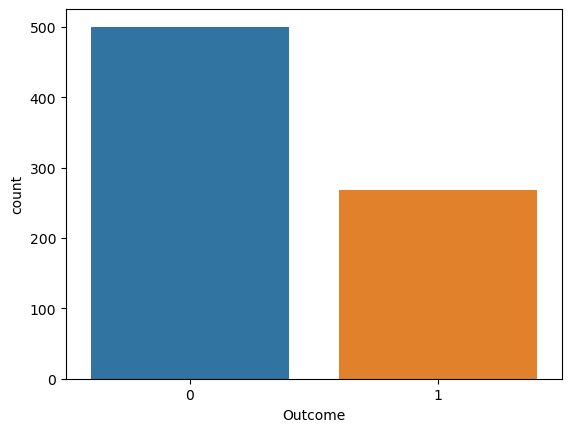

In [10]:
sns.countplot(x='Outcome',data=Diabetes)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Pregnancies', ylabel='Outcome'>

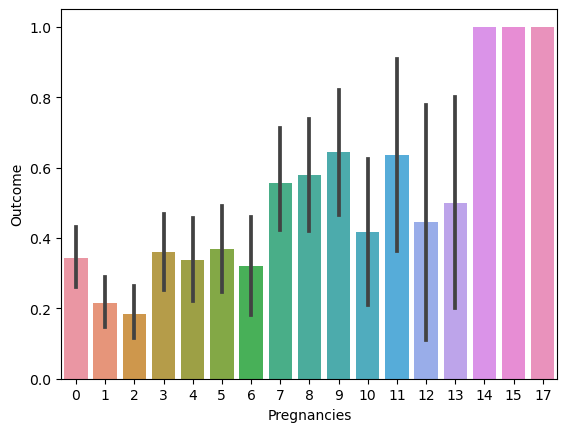

In [11]:
sns.barplot(x='Pregnancies',y='Outcome',data=Diabetes)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

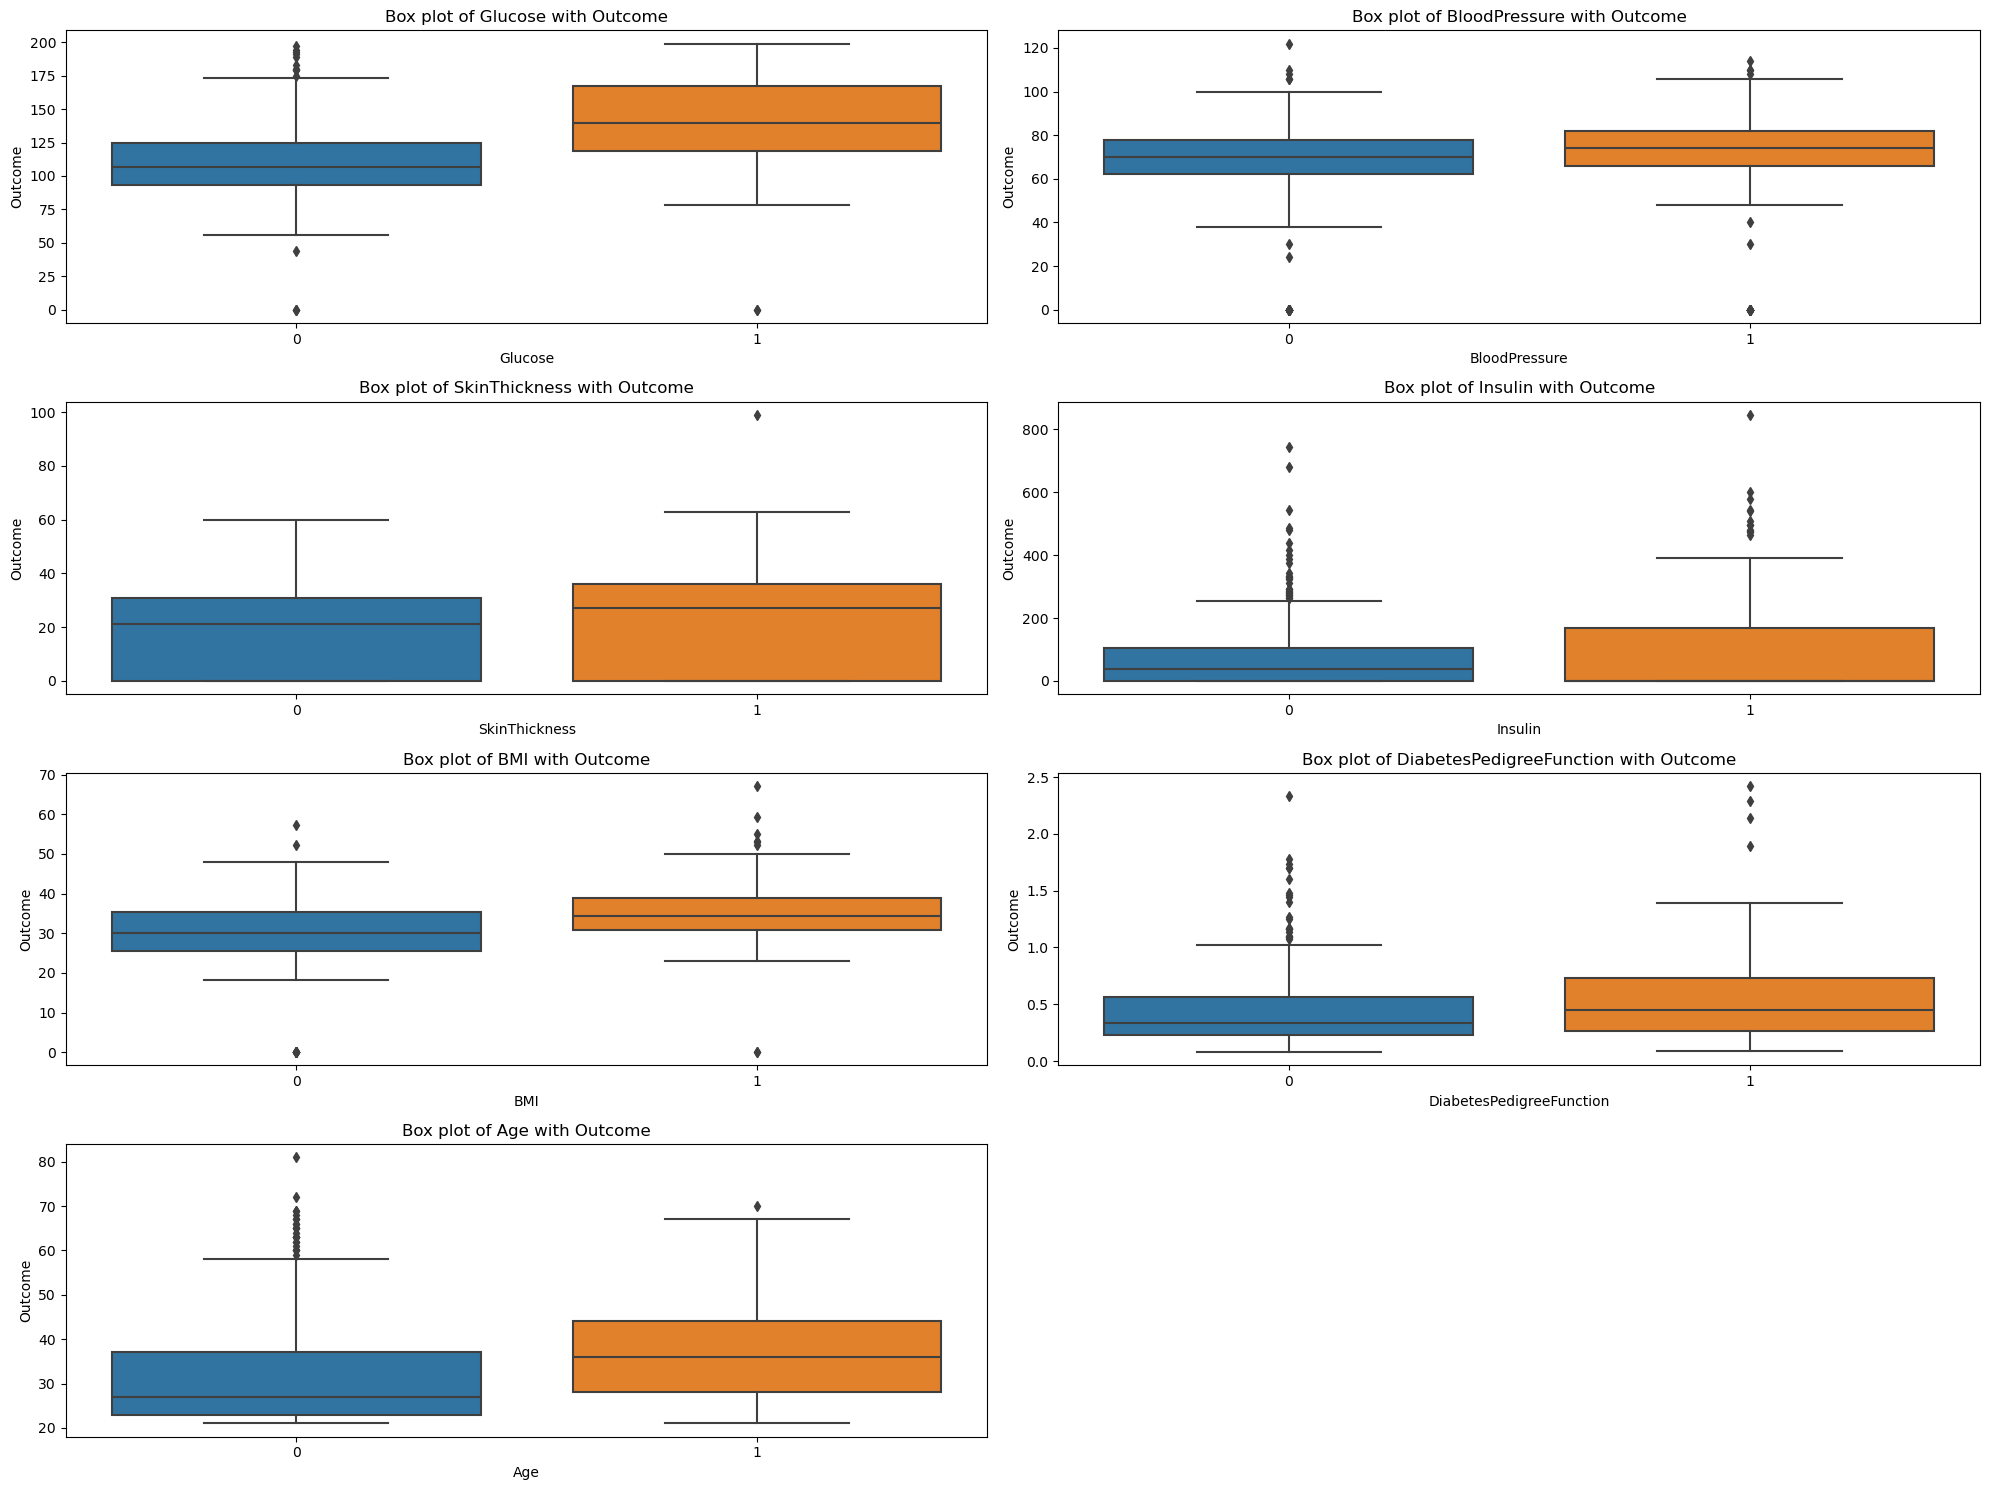

In [12]:
features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

plt.figure(figsize=(20, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(y=feature, x='Outcome', data=Diabetes)
    plt.title(f'Box plot of {feature} with Outcome')
    plt.xlabel(feature)
    plt.ylabel('Outcome')

plt.tight_layout()
plt.show()

In [13]:
Diabetes.groupby('Outcome').median(numeric_only=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.0,107.0,70.0,21.0,39.0,30.05,0.336,27.0
1,4.0,140.0,74.0,27.0,0.0,34.25,0.449,36.0


In [14]:
Diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
for column in zero_counts:
    median = Diabetes[column].median()
    Diabetes[column] = Diabetes[column].replace(0, median)

In [16]:
len(Diabetes[Diabetes['Pregnancies'] == 0])

0

In [17]:
#heat map
Diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.149326,0.247530,0.060706,-0.059580,0.080540,-0.016151,0.538169,0.245466
Glucose,0.149326,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.247530,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.060706,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.059580,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.080540,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.016151,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.538169,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.245466,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


<Axes: >

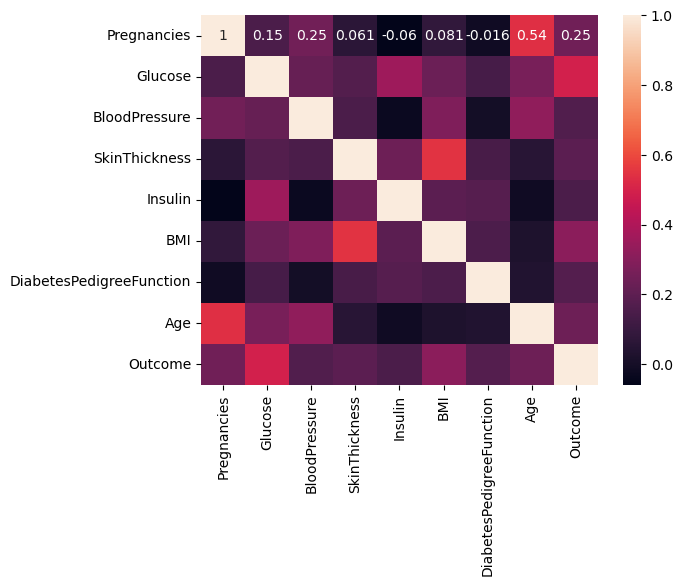

In [18]:
sns.heatmap(Diabetes.corr(),annot=True)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

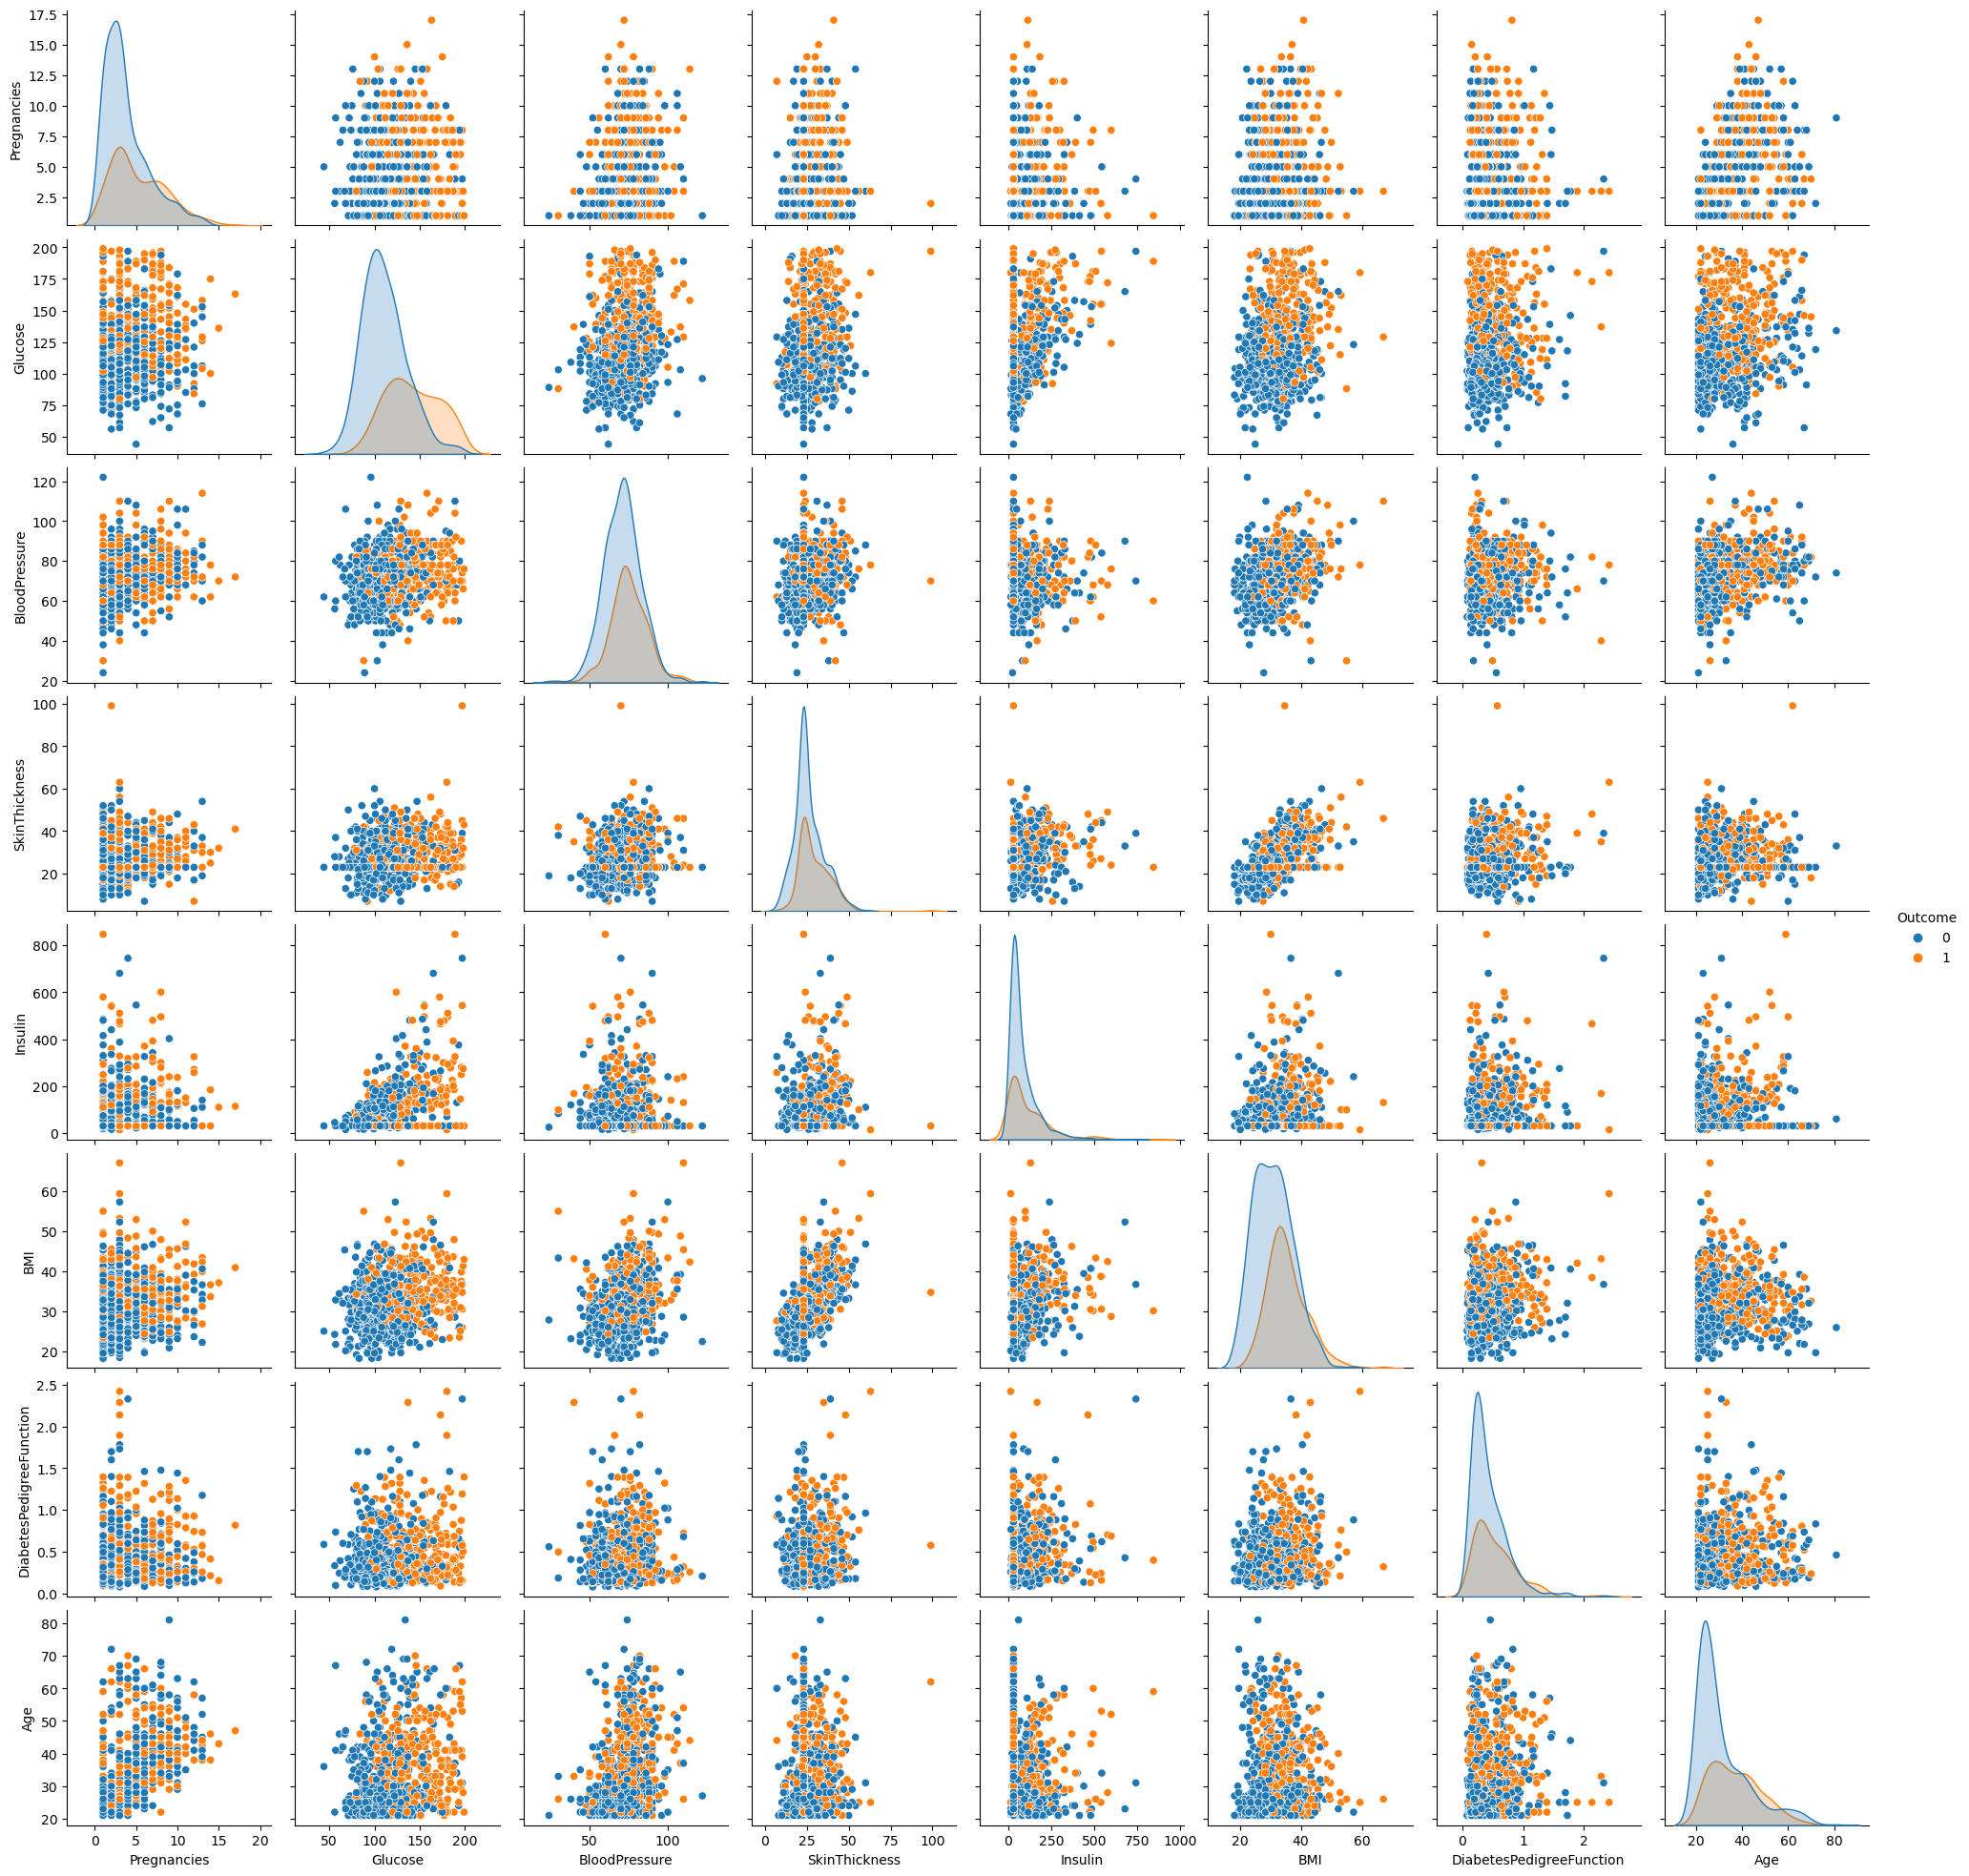

In [19]:
sns.pairplot(data=Diabetes,hue='Outcome')

In [20]:
#dividing the data set into x and y.
x_encoded=Diabetes.drop('Outcome',axis=1)
y=Diabetes['Outcome']

In [21]:
num_before=dict(Counter(y))
num_before

{1: 268, 0: 500}

In [22]:
smote=SMOTE()#saving the instance

In [23]:
x_smote,y_smote=smote.fit_resample(x_encoded,y)

In [24]:
num_after=dict(Counter(y_smote))
num_after

{1: 500, 0: 500}

In [25]:
after_smote=list(num_after.values())

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dty

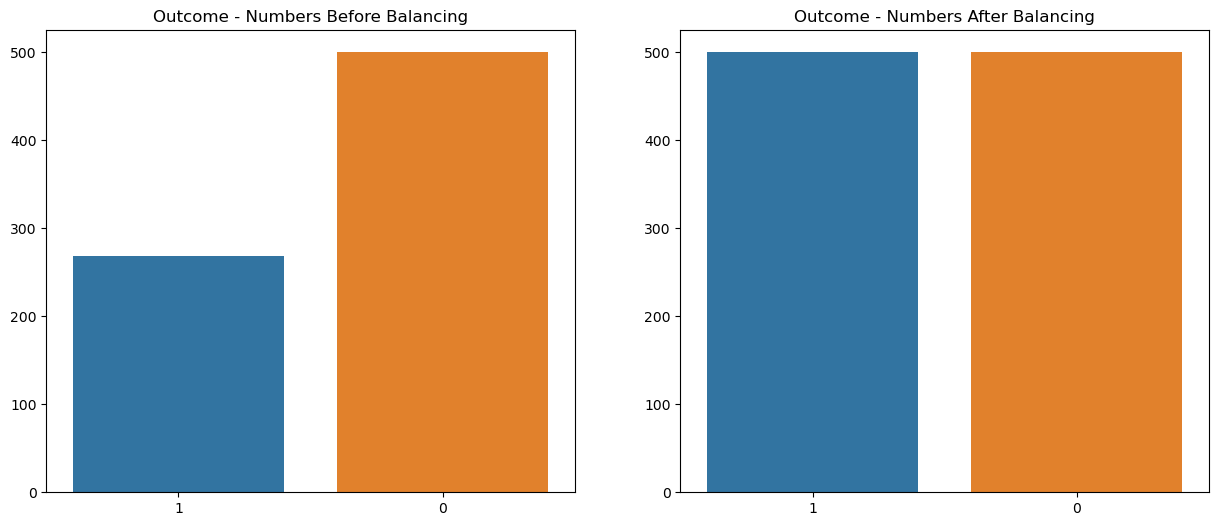

In [26]:
labels = ["1","0"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Outcome - Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=after_smote)
plt.title("Outcome - Numbers After Balancing")
plt.show()

In [27]:
#train-test split
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)

In [28]:
#Feature Scaling on x data(x_train & x_test)(Min-Max Scaling)
scaler_min_max = MinMaxScaler()
x_train = scaler_min_max.fit_transform(x_train)
x_test = scaler_min_max.transform(x_test)

In [29]:
#Feature Scaling on x data(x_train & x_test)(Standard Scaling)
scaler_standard = StandardScaler()
x_train = scaler_standard.fit_transform(x_train)
x_test = scaler_standard.transform(x_test)

In [30]:
models = []
models.append(('Logistic Regression' ,LogisticRegression(random_state=42)))
models.append(('Naive bayes', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 42)))
models.append(('Random Forest', RandomForestClassifier(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))
models.append(('XGBoost', XGBClassifier(random_state = 42)))
models.append(('GradientBoosting', GradientBoostingClassifier(random_state = 42)))
results = []
names = []

In [31]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Logistic Regression : 0.765
Naive bayes : 0.775
KNN : 0.775
CART : 0.755
Random Forest : 0.795
SVM : 0.76
XGBoost : 0.78


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


GradientBoosting : 0.785


In [32]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        precision = precision_score(y_test, y_pred)*100
        print('Precision_score')
        print("{} : {:.2f}%".format(name,precision))

Precision_score
Logistic Regression : 75.47%
Precision_score
Naive bayes : 79.79%
Precision_score
KNN : 73.33%
Precision_score
CART : 74.53%
Precision_score
Random Forest : 77.27%
Precision_score
SVM : 72.65%
Precision_score
XGBoost : 75.68%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Precision_score
GradientBoosting : 75.89%


In [33]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        recall = recall_score(y_test, y_pred)*100
        print('Recall_score')
        print("{} : {:.2f}%".format(name,recall))

Recall_score
Logistic Regression : 79.21%
Recall_score
Naive bayes : 74.26%
Recall_score
KNN : 87.13%
Recall_score
CART : 78.22%
Recall_score
Random Forest : 84.16%
Recall_score
SVM : 84.16%
Recall_score
XGBoost : 83.17%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Recall_score
GradientBoosting : 84.16%


In [34]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        f1 = f1_score(y_test, y_pred)*100
        print('f1_score')
        print("{} : {:.2f}%".format(name,f1))

f1_score
Logistic Regression : 77.29%
f1_score
Naive bayes : 76.92%
f1_score
KNN : 79.64%
f1_score
CART : 76.33%
f1_score
Random Forest : 80.57%
f1_score
SVM : 77.98%
f1_score
XGBoost : 79.25%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


f1_score
GradientBoosting : 79.81%


In [35]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        confusion = confusion_matrix(y_test, y_pred)
        print("{} : {}".format(name,confusion))
        print('----------------------------------')

Logistic Regression : [[73 26]
 [21 80]]
----------------------------------
Naive bayes : [[80 19]
 [26 75]]
----------------------------------
KNN : [[67 32]
 [13 88]]
----------------------------------
CART : [[72 27]
 [22 79]]
----------------------------------
Random Forest : [[74 25]
 [16 85]]
----------------------------------
SVM : [[67 32]
 [16 85]]
----------------------------------
XGBoost : [[72 27]
 [17 84]]
----------------------------------


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


GradientBoosting : [[72 27]
 [16 85]]
----------------------------------


In [36]:
lr=LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [37]:
y_pred_lr=lr.predict(x_test)
y_pred_lr

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1])

In [38]:
accuracy_lr= accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.765

In [39]:
train_score_lr=lr.score(x_train,y_train)
train_score_lr

0.755

In [40]:
test_score_lr=lr.score(x_test,y_test)
test_score_lr

0.765

In [41]:
#Train score is higher than the test score which depicts an overfitting scenario hence we will be applying hyper-parameter tuning on logistic regression
#applying hyper-parameter tuning for logistic regression
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [42]:
pipeline = Pipeline([
   ('scaler', StandardScaler()), ('clf', LogisticRegression())
])

In [43]:
param_grid = {
    'clf__C': [0.1, 1, 10],# lambda regularization parameters used for defining the extent of shrinkage of the coefficients of the model
    'clf__solver': ['liblinear', 'lbfgs'],
    'clf__penalty': ['l2']  # 'l1' is not compatible with 'lbfgs'
}

In [44]:
from sklearn.model_selection import GridSearchCV
grid_search_lr = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search_lr.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__C': [0.1, 1, 10], 'clf__penalty': ['l2'],
                         'clf__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [45]:
best_params = grid_search_lr.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}


In [46]:
best_C = best_params['clf__C']
best_solver = best_params['clf__solver']
best_penalty = best_params.get('clf__penalty', 'l2')
# The best accuracy score for Logistic Regression for best parameters is:

grid_search_lr.best_score_

0.7525000000000001

In [47]:
# Fitting the Logistic Regression with best parameters
lr_best_params = LogisticRegression(C=best_C, solver=best_solver, penalty=best_penalty)
lr_best_params.fit(x_train, y_train)
print(f"Train accuracy: {lr_best_params.score(x_train, y_train):.2f}")

Train accuracy: 0.76


In [48]:
print(f"Test accuracy: {lr_best_params.score(x_test, y_test):.2f}")

Test accuracy: 0.76


In [49]:
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [50]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1])

In [51]:
accuracy_rf= accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.795

In [52]:
test_score_rf=rf.score(x_test,y_test)
test_score_rf

0.795

In [53]:
train_score_rf=rf.score(x_train,y_train)
train_score_rf

1.0

In [54]:
rf_classifier=RandomForestClassifier(random_state=42)

In [55]:
param_grid_rf = {
    'max_depth': [2,3,5, 7],            # Maximum depth of the tree
    'min_samples_split':[2, 3, 6, 7],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3, 4, 5, 7]             # Minimum number of samples required to be at a leaf node
   # 'max_features': [None, 'sqrt', 'log2'],   # Number of features to consider at each split
   # 'criterion': ['gini', 'entropy'],         # Split criterion: Gini impurity or entropy
    #'max_leaf_nodes': [None, 10, 20, 30]       # Maximum number of leaf nodes in the tree
}

In [56]:
rf_gridsearch=GridSearchCV(rf_classifier, param_grid_rf,cv=3, scoring='accuracy')
#['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']

In [57]:
rf_gridsearch.fit(x_train, y_train) 

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 7],
                         'min_samples_split': [2, 3, 6, 7]},
             scoring='accuracy')

In [58]:
best_params_rf = rf_gridsearch.best_params_
best_params_rf

{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [59]:
#we are creating a new random forest classifier with the best hyper parameters
best_rf_classifier = RandomForestClassifier(**best_params_rf)
best_rf_classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=7)

In [60]:
y_pred_rf_tune=best_rf_classifier.predict(x_test)
y_pred_rf_tune

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1])

In [61]:
accuracy_rf_tune= accuracy_score(y_test, y_pred_rf_tune)
accuracy_rf_tune

0.805

In [62]:
train_score_rf_tune=best_rf_classifier.score(x_train,y_train)
train_score_rf_tune

0.9225

In [63]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [64]:
y_pred_dt=dt.predict(x_test)
y_pred_dt

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1])

In [65]:
accuracy_dt= accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.755

In [66]:
train_score_dt=dt.score(x_train,y_train)
train_score_dt

1.0

In [67]:
test_score_dt=dt.score(x_test,y_test)
test_score_dt

0.755

In [68]:
#applying decision tree with hyper parameter tuning
dt_classifier = DecisionTreeClassifier(random_state=42)

In [69]:
param_grid_dt = {
    'max_depth': [2,3, 5,7,10],            # Maximum depth of the tree
    #'min_samples_split': [2,3,5,7,10] ,         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2,3,4,5]             # Minimum number of samples required to be at a leaf node
    #'max_features': [None, 'sqrt', 'log2'],   # Number of features to consider at each split
    #'criterion': ['gini', 'entropy'],         # Split criterion: Gini impurity or entropy
    #'splitter': ['best', 'random'],            # Strategy to choose the split at each node
    #'max_leaf_nodes': [None, 10, 20, 30]       # Maximum number of leaf nodes in the tree
}

In [70]:
grid_search = GridSearchCV(dt_classifier, param_grid_dt, cv=5, scoring='accuracy')

In [71]:
grid_search.fit(x_train, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [72]:
best_params = grid_search.best_params_
best_params

{'max_depth': 7, 'min_samples_leaf': 2}

In [73]:
#we are creating a new decision tree classifier with the best hyper parameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2)

In [74]:
y_pred_dt_tune=best_dt_classifier.predict(x_test)
y_pred_dt_tune

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1])

In [75]:
accuracy_decision_dt_tune= accuracy_score(y_test, y_pred_dt_tune)
accuracy_decision_dt_tune

0.73

In [76]:
train_score_dt_tune=best_dt_classifier.score(x_train,y_train)
train_score_dt_tune

0.90125

In [ ]:
#Applying SVM with default parameters
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

In [ ]:
#applying svm kernel=linear
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

In [ ]:
svc_linear=SVC()
svc_linear.fit(x_train,y_train)

In [ ]:
y_pred_svc_linear=svc_linear.predict(x_test)
y_pred_svc_linear

In [ ]:
train_score_svc_linear=svc_linear.score(x_train,y_train)
train_score_svc_linear

In [ ]:
test_score_svc_linear=svc_linear.score(x_test,y_test)
test_score_svc_linear

In [ ]:
#applying svm kernel=rbf
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

In [ ]:
svc_rbf=SVC()
svc_rbf.fit(x_train,y_train)

In [ ]:
y_pred_svc_rbf=svc_rbf.predict(x_test)
y_pred_svc_rbf

In [ ]:
train_score_svc_rbf=svc_rbf.score(x_train,y_train)
train_score_svc_rbf

In [ ]:
test_score_svc_rbf=svc_rbf.score(x_test,y_test)
test_score_svc_rbf

In [ ]:
#applying svm kernel=poly
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

In [ ]:
svc_poly=SVC()
svc_poly.fit(x_train,y_train)

In [ ]:
y_pred_svc_poly=svc_poly.predict(x_test)
y_pred_svc_poly

In [ ]:
train_score_svc_poly=svc_poly.score(x_train,y_train)
train_score_svc_poly

In [ ]:
test_score_svc_poly=svc_poly.score(x_test,y_test)
test_score_svc_poly

In [ ]:
#Applying different kernals with cross validation
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, x_smote, y_smote, cv=3, scoring='accuracy')
print(scores)
print(scores.mean())

In [ ]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, x_smote, y_smote, cv=3, scoring='accuracy')
print(scores)
print(scores.mean())

In [ ]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='poly')
scores = cross_val_score(svc, x_smote, y_smote, cv=3, scoring='accuracy')
print(scores)
print(scores.mean())

In [ ]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='sigmoid')
scores = cross_val_score(svc, x_smote, y_smote, cv=3, scoring='accuracy')
print(scores)
print(scores.mean())

In [ ]:
C_range=[5,10,15,20,25]
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, x_smote, y_smote, cv=3, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

In [ ]:
np.mean(acc_score)

In [ ]:
plt.plot(C_range, acc_score, marker='o')
plt.xticks(np.arange(1, 26, 2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. C value for SVC')
plt.grid(True)
plt.show()

C=5,7,9,10 accuracy 76% to 75%

In [ ]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, x_smote, y_smote, cv=2, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

In [ ]:
np.mean(acc_score)

In [ ]:
plt.plot(C_range, acc_score, marker='o')
plt.xticks(np.arange(0.1,6,0.4))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. C value for SVC')
plt.grid(True)
plt.show()

C (2.6,)

In [ ]:
C_range=[5,10,15,20,25]
acc_score=[]
for c in C_range:
    svc = SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, x_smote, y_smote, cv=2, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

In [ ]:
np.mean(acc_score)

In [ ]:
plt.plot(C_range, acc_score, marker='o')
plt.xticks(np.arange(5, 26, 2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. C value for SVC')
plt.grid(True)
plt.show()

C=23,24,25 accuracy 74%

In [ ]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, x_smote, y_smote, cv=3, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

In [ ]:
np.mean(acc_score)

In [ ]:
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

C(2,3) accuracy 74%

In [ ]:
svm_model = svm.SVC()

In [ ]:
tuned_parameters = {'C':[5,7,9, 10, 2],'kernel': ['linear'],'C':[2,3,4,5,6, 1],'kernel': ['linear'],
        'C':[23,24,25,1],'kernel': ['rbf'],
        'degree':[2,3,1],'kernel': ['poly']}

In [ ]:
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=3,scoring='accuracy')
model_svm.fit(x_train, y_train)
print(model_svm.best_score_)
print(model_svm.best_params_)
y_pred= model_svm.predict(x_test)
print(metrics.accuracy_score(y_pred,y_test))

In [ ]:
svc_best=SVC(kernel='poly',C=23, degree=1)
svc_best.fit(x_train,y_train)

In [ ]:
y_pred_svc=svc_best.predict(x_test)
y_pred_svc

In [ ]:
accuracy_svc_tune= accuracy_score(y_test, y_pred_svc)
accuracy_svc_tune

In [ ]:
train_score_svc_tune=svc_best.score(x_train,y_train)
train_score_svc_tune

In [ ]:
test_score_svc_tune=svc_best.score(x_test,y_test)
test_score_svc_tune

In [77]:
#Applying KNN Classifier to check whether it can capture the historical data better than the best model from the above list (in the for loop)
from sklearn.neighbors import KNeighborsClassifier
neighbors1 = np.arange(1,9)
neighbors1

array([1, 2, 3, 4, 5, 6, 7, 8])

In [78]:
#Setting up arrays to store the train and test accuracies for different values of k
train_accuracy1= np.empty(len(neighbors1))

In [79]:
test_accuracy1 = np.empty(len(neighbors1))

In [80]:
#Generating a for loop with the list of neighbors to do the train data fit for each of the 'K' values & find out their tain & test accuracies
for i,k in enumerate(neighbors1):#enumerate-We are using a for loop to itterate over different values of 'K' for the number of neighbors in a K nearest neighbor classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Using scikitlearn's KNeighborsClassifier, we are training the classifier with different values of k and evaluating
    # it's performance.
    
    knn.fit(x_train, y_train)
    
    
    train_accuracy1[i] = knn.score(x_train, y_train)
    
   
    test_accuracy1[i] = knn.score(x_test, y_test)

In [81]:
train_accuracy1

array([1.     , 0.93   , 0.88375, 0.8625 , 0.84625, 0.84   , 0.83125,
       0.83125])

In [82]:
test_accuracy1

array([0.785, 0.785, 0.785, 0.77 , 0.775, 0.755, 0.775, 0.775])

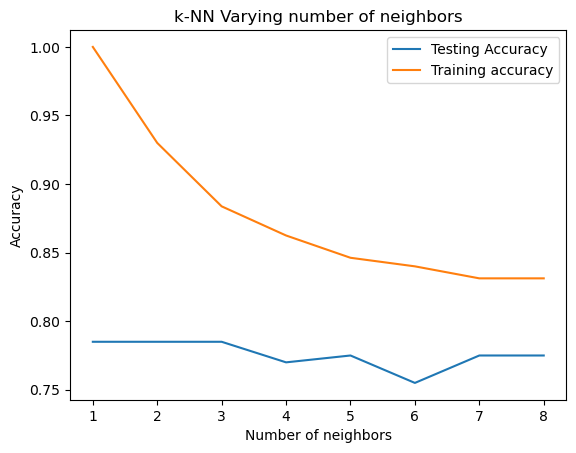

In [83]:
# Checking for the stable train and test accuracy scores with the help of plot

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors1, test_accuracy1, label='Testing Accuracy')
plt.plot(neighbors1, train_accuracy1, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [84]:
#Applying KNN Classifier to check whether it can capture the historical data better than the best model from the above list (in the for loop)
from sklearn.neighbors import KNeighborsClassifier
neighbors2 = np.arange(1,15)
neighbors2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [85]:
#Setting up arrays to store the train and test accuracies for different values of k
train_accuracy2 = np.empty(len(neighbors2))

In [86]:
test_accuracy2 = np.empty(len(neighbors2))

In [87]:
#Generating a for loop with the list of neighbors to do the train data fit for each of the 'K' values & find out their tain & test accuracies
for i,k in enumerate(neighbors2):#enumerate-We are using a for loop to itterate over different values of 'K' for the number of neighbors in a K nearest neighbor classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Using scikitlearn's KNeighborsClassifier, we are training the classifier with different values of k and evaluating
    # it's performance.
    
    knn.fit(x_train, y_train)
    
    
    train_accuracy2[i] = knn.score(x_train, y_train)
    
   
    test_accuracy2[i] = knn.score(x_test, y_test)

In [88]:
train_accuracy2

array([1.     , 0.93   , 0.88375, 0.8625 , 0.84625, 0.84   , 0.83125,
       0.83125, 0.8275 , 0.8175 , 0.81375, 0.82125, 0.81625, 0.8125 ])

In [89]:
test_accuracy2

array([0.785, 0.785, 0.785, 0.77 , 0.775, 0.755, 0.775, 0.775, 0.8  ,
       0.795, 0.775, 0.755, 0.76 , 0.755])

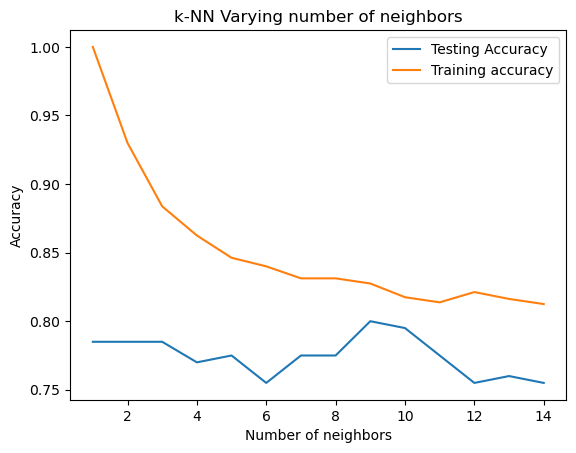

In [90]:
# Checking for the stable train and test accuracy scores with the help of plot

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors2, test_accuracy2, label='Testing Accuracy')
plt.plot(neighbors2, train_accuracy2, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [91]:
#Applying KNN Classifier to check whether it can capture the historical data better than the best model from the above list (in the for loop)
from sklearn.neighbors import KNeighborsClassifier
neighbors3 = np.arange(15,30)
neighbors3

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [92]:
#Setting up arrays to store the train and test accuracies for different values of k
train_accuracy3 = np.empty(len(neighbors3))

In [93]:
test_accuracy3 = np.empty(len(neighbors3))

In [94]:
#Generating a for loop with the list of neighbors to do the train data fit for each of the 'K' values & find out their tain & test accuracies
for i,k in enumerate(neighbors3):#enumerate-We are using a for loop to itterate over different values of 'K' for the number of neighbors in a K nearest neighbor classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Using scikitlearn's KNeighborsClassifier, we are training the classifier with different values of k and evaluating
    # it's performance.
    
    knn.fit(x_train, y_train)
    
    
    train_accuracy3[i] = knn.score(x_train, y_train)
    
   
    test_accuracy3[i] = knn.score(x_test, y_test)

In [95]:
train_accuracy3

array([0.81625, 0.815  , 0.8125 , 0.805  , 0.8    , 0.795  , 0.79   ,
       0.78   , 0.77875, 0.77875, 0.7725 , 0.78   , 0.77125, 0.77125,
       0.7725 ])

In [96]:
test_accuracy3

array([0.77 , 0.73 , 0.755, 0.75 , 0.76 , 0.74 , 0.74 , 0.73 , 0.74 ,
       0.725, 0.73 , 0.74 , 0.735, 0.745, 0.74 ])

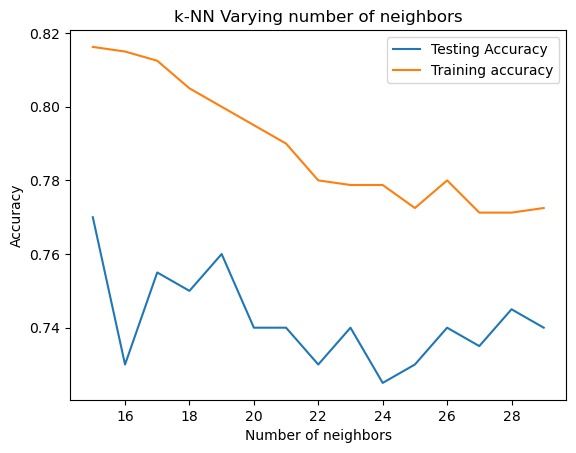

In [97]:
# Checking for the stable train and test accuracy scores with the help of plot

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors3, test_accuracy3, label='Testing Accuracy')
plt.plot(neighbors3, train_accuracy3, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

for K=26 

Train_score=0.79

Test_score=0.785

In [98]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1])

In [99]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.74

In [100]:
train_score_knn=knn.score(x_train,y_train)
train_score_knn

0.7725

In [101]:
#Defining the KNN classifier
knn_classifier=KNeighborsClassifier()

In [102]:
#Defining the parameter grid
param_grid_knn = {
    'n_neighbors': [15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
    #'weights': ['uniform', 'distance'],
   #'p': [1, 2]
}

In [103]:
#Performing grid search with cross-validation
from sklearn.model_selection import GridSearchCV
knn_cv = GridSearchCV(knn, param_grid_knn, cv=5)

In [104]:
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                         25, 26, 27, 28, 29, 30]})

In [105]:
best_knn=knn_cv.best_estimator_

In [106]:
knn_cv.best_params_

{'n_neighbors': 15}

In [107]:
knn_cv.best_score_

0.7625

In [108]:
y_pred_knn_tune=best_knn.predict(x_test)
y_pred_knn_tune

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1])

In [109]:
train_score_knn=best_knn.score(x_train,y_train)
train_score_knn

0.81625

In [110]:
accuracy_knn = accuracy_score(y_test, y_pred_knn_tune)
accuracy_knn

0.77

 SVM give 1% overfitting after hyper-parameter tuning and accuracy=74% 
 Do the evaluation metrics for this instance

ROC curve 

Find the probability of predicted values

In [113]:
y_pred_prob=best_knn.predict_proba(x_test)[:,1]#The probability predictions are needed for constructing ROC curve which is the graphical representation of the trade off between true positive & false positive rates at various threshold values.It is created by plotting the true positive range(TPR) against the false positive rate(FPR)at different threshold values for a binary classification model.
y_pred_prob

array([0.2       , 0.4       , 0.86666667, 0.8       , 0.6       ,
       0.13333333, 0.06666667, 0.        , 0.93333333, 0.        ,
       0.93333333, 0.33333333, 0.86666667, 0.93333333, 0.73333333,
       0.93333333, 0.66666667, 0.8       , 0.93333333, 0.86666667,
       0.86666667, 0.06666667, 0.6       , 0.        , 0.        ,
       1.        , 0.26666667, 0.93333333, 0.93333333, 0.93333333,
       0.06666667, 0.4       , 0.4       , 0.66666667, 0.66666667,
       0.53333333, 0.        , 0.86666667, 0.73333333, 0.26666667,
       0.06666667, 0.06666667, 0.73333333, 0.73333333, 0.4       ,
       0.        , 0.93333333, 0.2       , 0.46666667, 0.73333333,
       0.33333333, 1.        , 0.66666667, 0.8       , 0.93333333,
       0.66666667, 0.        , 0.33333333, 0.66666667, 0.46666667,
       0.8       , 0.86666667, 0.53333333, 0.93333333, 0.93333333,
       0.6       , 0.8       , 0.93333333, 0.06666667, 0.2       ,
       0.73333333, 0.53333333, 0.86666667, 0.06666667, 0.6    

Threshold variation

ROC curve illustrates the classifiers performance accross a range of thresold values where each point in the ROC curve represents a different decision threshold for converting predicted probability into class labels(categories=0,1,etc.)

Different points on the ROC curve correspond to different balance points between sensitivity and specificity and helps us to assign the predicted probabilities of instances belonging to each class

specificity=True Negative/(True Negative+False Positive)

sensitivity=True Positive/(True Positive+False Negative)

High specificity means the model is good at avoiding False Positives but may have more False Negatives

High sensitivity means the model is identifying positive cases but may have more False Positives

In [114]:
#Change the results of ROC curve with SVM
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
fpr, tpr, thresholds 

(array([0.        , 0.        , 0.02020202, 0.07070707, 0.14141414,
        0.18181818, 0.21212121, 0.32323232, 0.37373737, 0.39393939,
        0.48484848, 0.55555556, 0.60606061, 0.67676768, 0.72727273,
        0.81818182, 1.        ]),
 array([0.        , 0.02970297, 0.24752475, 0.33663366, 0.5049505 ,
        0.63366337, 0.74257426, 0.79207921, 0.91089109, 0.92079208,
        0.94059406, 0.95049505, 0.95049505, 0.95049505, 0.97029703,
        1.        , 1.        ]),
 array([       inf, 1.        , 0.93333333, 0.86666667, 0.8       ,
        0.73333333, 0.66666667, 0.6       , 0.53333333, 0.46666667,
        0.4       , 0.33333333, 0.26666667, 0.2       , 0.13333333,
        0.06666667, 0.        ]))

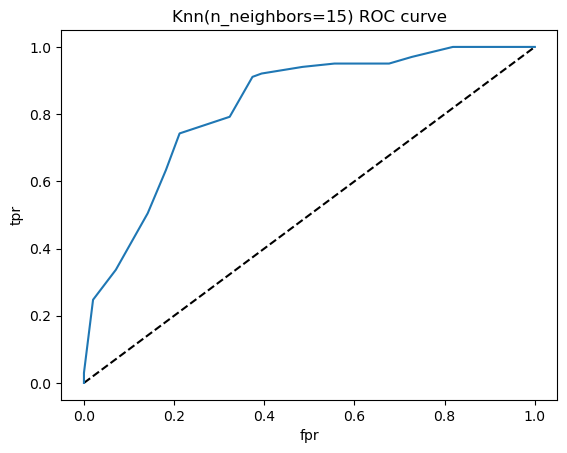

In [116]:
# Plot ROC Curve

plt.plot([0,1],[0,1],'k--')#We are creating a black dashed diagonal line from the bottom left to the top right corner of the plot helping us to visually assess the model's ROC curves 
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=15) ROC curve')
plt.show()

In [118]:
# Finding the ROC AUC-(Area Under the ROC Curve) score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob)

0.8244824482448245

The AUC of the ROC curve has high score of 82.44 % which is quite desireable